## 

## Import

In [17]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

## Load data

In [2]:
data = pd.read_csv('credit_risk_dataset.csv')
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


## Data preprocessing

In [3]:
# find the missing values from data

missing_values = data.isnull().sum()
display(missing_values)
print(f"Rows, culumns in data: {data.shape}")

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Rows, culumns in data: (32581, 12)


In [4]:
# impute missing values using scikit-learn, using median as the method

numerical_features = ['person_emp_length', 'loan_int_rate'] # columns with missing values
imputer = SimpleImputer(strategy='median')
data[numerical_features] = imputer.fit_transform(data[numerical_features])


In [5]:
# missing_values = data.isnull().sum()
# print(missing_values)
print(data.shape)

(32581, 12)


In [6]:
# encode into numerical values for the ML model
data['loan_grade'] = data['loan_grade'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})
data['person_home_ownership'] = data['person_home_ownership'].map({'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER':3})
data['loan_intent'] = data['loan_intent'].map({'DEBTCONSOLIDATION': 0, 'EDUCATION': 1, 'HOMEIMPROVEMENT': 2, 'MEDICAL': 3, 'PERSONAL': 4, 'VENTURE': 5})
data['cb_person_default_on_file'] = data['cb_person_default_on_file'].map({'N': 0, 'Y': 1})

In [7]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,1,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,2,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,0,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,0,8.0,3,2,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,2,1.0,4,2,5800,13.16,0,0.11,0,30
32577,54,120000,2,4.0,4,0,17625,7.49,0,0.15,0,19
32578,65,76000,0,3.0,2,1,35000,10.99,1,0.46,0,28
32579,56,150000,2,5.0,4,1,15000,11.48,0,0.10,0,26


### Splitting data into datasets

In [9]:
from sklearn.model_selection import train_test_split

X = data.drop('loan_grade', axis=1).values # dataset excluding loan_grade (independent variables)
y = data['loan_grade']  # only the load_grade column (dependent variable, or output)

# splitting the dataset:
# 20% of the data is attributed to the testing set of each variable
# the seed for the split is 42
# stratify ensures that the split is proportionate for each possible value of the variables

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape # ((26064, 11), (6517, 11), (26064,), (6517,))

((26064, 11), (6517, 11), (26064,), (6517,))

In [10]:
# scaling the data, mean = 0, std = 1 (z-score normalization)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Visualize Data

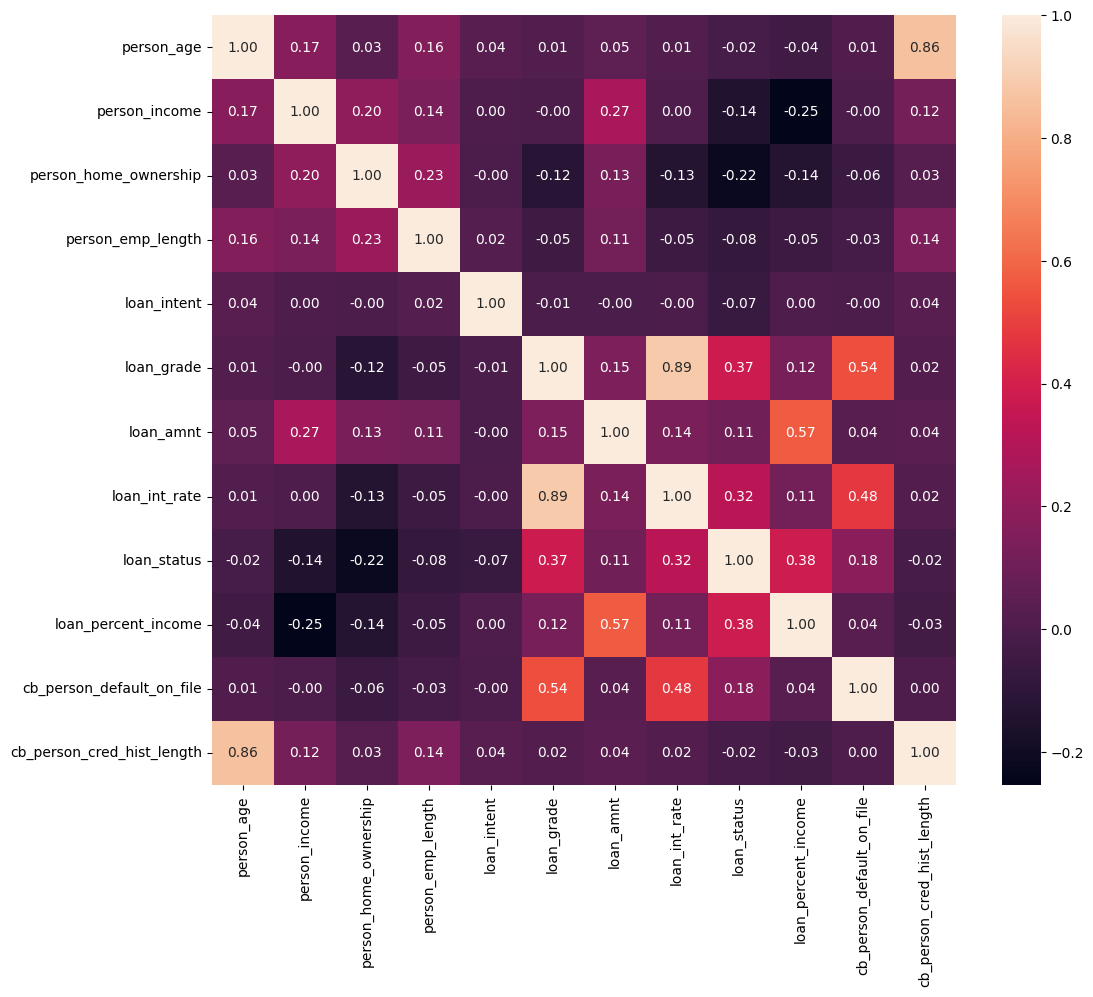

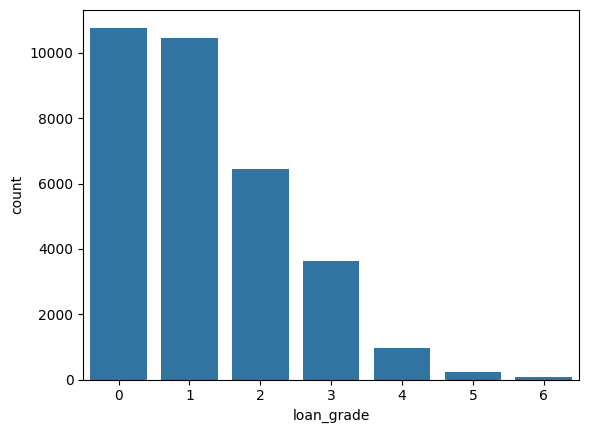

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# display correlation heatmap for the different features

plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show() # works because seaborn is built on top of matplotlib

# distribution of loan_grade in data
sns.countplot(x='loan_grade', data=data)
plt.show()


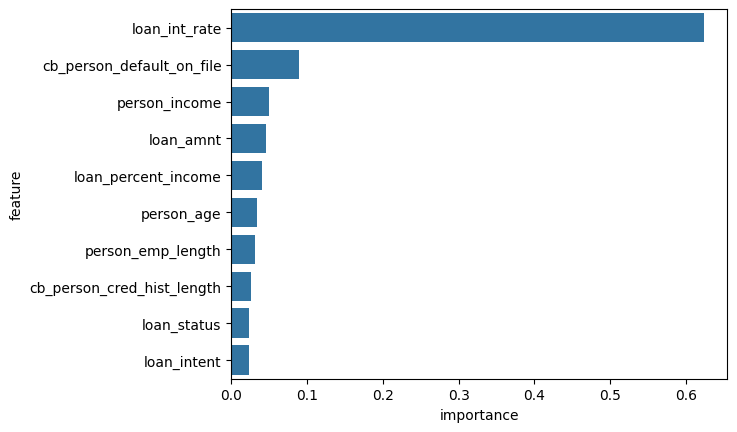

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
feature_names = data.drop('loan_grade', axis=1).columns

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.show()

# loan_int_rate is 0.6 in importance, much greater than the other parameters (<0.1)

## Building the model

In [13]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# convert training and testing data into tensors for PyTorch

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  # float for the different features
y_train_tensor = torch.tensor(y_train, dtype=torch.long)     # long for the loan_grade (discrete)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# creating tensordataset and dataloader to batch the data into smaller chunks for each epoch

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True) # to prevent model from memorizing the order of data
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False) # evaluate on the same order of data


/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# creating the model class

class LoanGradeModel(nn.Module):  # subclass of nn.Module
    def __init__(self):
        super(LoanGradeModel, self).__init__()
        self.fc1 = nn.Linear(11, 32) #fully connected layer(11 inputs bc we have 11 features)
        self.fc2 = nn.Linear(32, 64) 
        self.fc3 = nn.Linear(64, 7) # 7 outputs bc we have 7 possible loan_grades

        self.dropout = nn.Dropout(0.3)  #drop 30% of the neurons to prevent overfitting
        

    def forward(self, x):  #forward pass function
        x = F.relu(self.fc1(x)) #first fully connected layer (through rectified linear unit)
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x


model = LoanGradeModel()
model

LoanGradeModel(
  (fc1): Linear(in_features=11, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=7, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [15]:
loss_fn = nn.CrossEntropyLoss()  # loss function (compares predicted values with actual values)
optimizer = optim.Adam(model.parameters(), lr=0.01) # adjusts the models parameters (weights and biases)

In [16]:
num_epochs = 1000

for epoch in range(num_epochs):
    model.train()  # set model to training mode

    running_loss = 0.0    # initialize total loss
    correct = 0           # initialize correct predictions
    total = 0             # initialize total predictions
    
    for X_batch, y_batch in train_loader:       # loop over the training data batch by batch
        optimizer.zero_grad()                   # clear gradients from previous step
        y_pred = model(X_batch)                 # forward pass (make pred using current states of parameters)
        loss = loss_fn(y_pred, y_batch)         # compute loss
        loss.backward()                         # backward pass (compute gradients: how much loss is increased/decreased for each parameter)
        optimizer.step()                        # update the model's parameters
        
        # Accumulate loss and correct predictions
        running_loss += loss.item() * X_batch.size(0)               # accumulate the loss, scaled by batch size (total loss of current epoch)
        correct += (y_pred.argmax(dim=1) == y_batch).sum().item()   # count correct predictions
        total += y_batch.size(0)                                    # accumulate the total number of samples processed

    epoch_loss = running_loss / total       # Average loss for the entire epoch
    epoch_acc = correct / total             # Accuracy for the entire epoch
    
    print(f'Epoch {epoch + 1}, Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f}')


Epoch 2, Loss: 0.5385, Acc: 0.8143
Epoch 3, Loss: 0.5265, Acc: 0.8189
Epoch 4, Loss: 0.5227, Acc: 0.8198
Epoch 5, Loss: 0.5148, Acc: 0.8215
Epoch 6, Loss: 0.5114, Acc: 0.8234
Epoch 7, Loss: 0.5057, Acc: 0.8242
Epoch 8, Loss: 0.5090, Acc: 0.8229
Epoch 9, Loss: 0.5035, Acc: 0.8247
Epoch 10, Loss: 0.5019, Acc: 0.8227
Epoch 11, Loss: 0.4928, Acc: 0.8246
Epoch 12, Loss: 0.4943, Acc: 0.8251
Epoch 13, Loss: 0.4938, Acc: 0.8264
Epoch 14, Loss: 0.4877, Acc: 0.8268
Epoch 15, Loss: 0.4824, Acc: 0.8269
Epoch 16, Loss: 0.4889, Acc: 0.8258
Epoch 17, Loss: 0.4899, Acc: 0.8270
Epoch 18, Loss: 0.4787, Acc: 0.8303
Epoch 19, Loss: 0.4790, Acc: 0.8290
Epoch 20, Loss: 0.4801, Acc: 0.8266
Epoch 21, Loss: 0.4814, Acc: 0.8304
Epoch 22, Loss: 0.4802, Acc: 0.8305
Epoch 23, Loss: 0.4921, Acc: 0.8246
Epoch 24, Loss: 0.4820, Acc: 0.8261
Epoch 25, Loss: 0.4783, Acc: 0.8294
Epoch 26, Loss: 0.4860, Acc: 0.8313
Epoch 27, Loss: 0.4801, Acc: 0.8270
Epoch 28, Loss: 0.4853, Acc: 0.8276
Epoch 29, Loss: 0.4840, Acc: 0.8278


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=64ff84bb-62a5-4e3f-9228-3a17f5f81145' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>